## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [163]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **나.  학습데이터 불러오기**

In [164]:
df = pd.read_csv('/content/drive/MyDrive/kmong/url_detective/train_dataset.csv')

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [165]:
coulmns = df.columns

In [166]:
for i in coulmns:
  print(df[i].isnull().value_counts())

False    3664
Name: Unnamed: 0, dtype: int64
False    3664
Name: url_len, dtype: int64
False    3664
Name: url_num_hyphens_dom, dtype: int64
False    3663
True        1
Name: url_path_len, dtype: int64
False    3663
True        1
Name: url_domain_len, dtype: int64
False    3664
Name: url_hostname_len, dtype: int64
False    3664
Name: url_num_dots, dtype: int64
False    3664
Name: url_num_underscores, dtype: int64
False    3664
Name: url_query_len, dtype: int64
False    3664
Name: url_num_query_para, dtype: int64
False    3664
Name: url_ip_present, dtype: int64
False    3664
Name: url_entropy, dtype: int64
False    3664
Name: url_chinese_present, dtype: int64
False    3664
Name: url_port, dtype: int64
False    3664
Name: html_num_tags('iframe'), dtype: int64
False    3664
Name: html_num_tags('script'), dtype: int64
False    3664
Name: html_num_tags('embed'), dtype: int64
False    3664
Name: html_num_tags('object'), dtype: int64
False    3664
Name: html_num_tags('div'), dtype: int64
Fals

1. 변수가 내포하고 있는 의미
-> 각 웹사이트별로 웹사이트들이 가질수 있는 특징(url의 길이,특정 html 태그의 갯수)들을 내포하고 있다.
2. 변수가 수치형인지,범주형인지
-> 모든 변수는 수치형 변수이다.
3. 결측치 존재 여부 및 조치 방안
-> 결측치가 존재하며 갯수가 많지 않으므로 해당 행을 삭제한다.



4. 기초 통계량 확인
5.데이터 분포 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


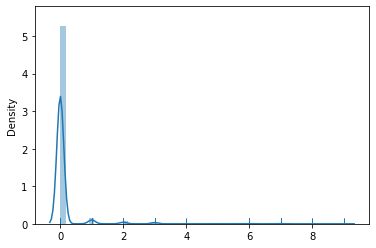

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

x_1 = df.url_num_query_para.values
sns.distplot(x_1, kde=True, rug=True)
plt.show()

6.위 정보로부터 파악한 내용 정리  
->대부분의 url query의 parameter 갯수는 0개이다  
7.추가 분석사항 도출




## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

숫자-->범주 이므로 로지스틱 회귀모형을 통해 검정 수행

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
import numpy as np;

df = df.dropna()

df = df.replace('benign', 1)
df = df.replace('malicious', -1)

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]


log_reg = LogisticRegression()
log_reg.fit(X, y)
 
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(X)
print(y_pred)
print(list(y))
 
print('정확도 :', metrics.accuracy_score(y, y_pred))

                            OLS Regression Results                            
Dep. Variable:              Result_v1   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     76.55
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          3.19e-280
Time:                        08:50:43   Log-Likelihood:                -4499.4
No. Observations:                3662   AIC:                             9045.
Df Residuals:                    3639   BIC:                             9187.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[:

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [169]:
df = pd.read_csv('/content/drive/MyDrive/kmong/url_detective/train_dataset.csv')

In [170]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [171]:
# 중복 데이터 제거를 제거합니다.
df = df.drop_duplicates(['url_domain_len','url_num_dots','url_num_underscores','url_query_len','url_num_query_para'])

In [172]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 3656
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               488 non-null    int64  
 1   url_len                  488 non-null    float64
 2   url_num_hyphens_dom      488 non-null    float64
 3   url_path_len             488 non-null    float64
 4   url_domain_len           487 non-null    float64
 5   url_hostname_len         488 non-null    float64
 6   url_num_dots             488 non-null    float64
 7   url_num_underscores      488 non-null    float64
 8   url_query_len            488 non-null    float64
 9   url_num_query_para       488 non-null    float64
 10  url_ip_present           488 non-null    float64
 11  url_entropy              488 non-null    float64
 12  url_chinese_present      488 non-null    float64
 13  url_port                 488 non-null    float64
 14  html_num_tags('iframe')  

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [173]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [174]:
df_ex = df_ex.replace('CA', 'California')
df_ex = df_ex.replace('NY', 'NewYork')
print(df_ex)

      name  age       state  point
0    Alice   24     NewYork     64
1      Bob   42  California     24
2  Charlie   18  California     70
3     Dave   68          TX     70
4    Ellen   24  California     88
5    Frank   30     NewYork     57


### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [175]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
df['Result_v1'].unique()


array(['malicious', 'benign'], dtype=object)

In [176]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
df = df.replace('benign', 1)
df = df.replace('malicious', -1)
print(df)





      Unnamed: 0  url_len  url_num_hyphens_dom  url_path_len  url_domain_len  \
0              0     23.0                  0.0           8.0            15.0   
1              1     75.0                  0.0          58.0            17.0   
2              2     20.0                  0.0           4.0            16.0   
3              3     27.0                  0.0          13.0            14.0   
4              4     39.0                  2.0          12.0            27.0   
...          ...      ...                  ...           ...             ...   
3627        3627     43.0                  0.0          22.0            21.0   
3629        3629     58.0                  0.0          40.0            18.0   
3639        3639     52.0                  0.0          40.0            12.0   
3641        3641     96.0                  0.0          61.0            16.0   
3656        3656    126.0                  0.0          46.0            17.0   

      url_hostname_len  url_num_dots  u

In [177]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
df['Result_v1'].unique()




array([-1,  1])

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [178]:
# 결축치의 존재를 확인합니다.
for i in coulmns:
  print(df[i].isnull().value_counts())


False    488
Name: Unnamed: 0, dtype: int64
False    488
Name: url_len, dtype: int64
False    488
Name: url_num_hyphens_dom, dtype: int64
False    488
Name: url_path_len, dtype: int64
False    487
True       1
Name: url_domain_len, dtype: int64
False    488
Name: url_hostname_len, dtype: int64
False    488
Name: url_num_dots, dtype: int64
False    488
Name: url_num_underscores, dtype: int64
False    488
Name: url_query_len, dtype: int64
False    488
Name: url_num_query_para, dtype: int64
False    488
Name: url_ip_present, dtype: int64
False    488
Name: url_entropy, dtype: int64
False    488
Name: url_chinese_present, dtype: int64
False    488
Name: url_port, dtype: int64
False    488
Name: html_num_tags('iframe'), dtype: int64
False    488
Name: html_num_tags('script'), dtype: int64
False    488
Name: html_num_tags('embed'), dtype: int64
False    488
Name: html_num_tags('object'), dtype: int64
False    488
Name: html_num_tags('div'), dtype: int64
False    488
Name: html_num_tags('head

In [179]:
# 결측치를 적절히 처리해줍니다.
df = df.dropna()



In [180]:
# 결축치의 존재를 확인합니다.
for i in coulmns:
  print(df[i].isnull().value_counts())


False    487
Name: Unnamed: 0, dtype: int64
False    487
Name: url_len, dtype: int64
False    487
Name: url_num_hyphens_dom, dtype: int64
False    487
Name: url_path_len, dtype: int64
False    487
Name: url_domain_len, dtype: int64
False    487
Name: url_hostname_len, dtype: int64
False    487
Name: url_num_dots, dtype: int64
False    487
Name: url_num_underscores, dtype: int64
False    487
Name: url_query_len, dtype: int64
False    487
Name: url_num_query_para, dtype: int64
False    487
Name: url_ip_present, dtype: int64
False    487
Name: url_entropy, dtype: int64
False    487
Name: url_chinese_present, dtype: int64
False    487
Name: url_port, dtype: int64
False    487
Name: html_num_tags('iframe'), dtype: int64
False    487
Name: html_num_tags('script'), dtype: int64
False    487
Name: html_num_tags('embed'), dtype: int64
False    487
Name: html_num_tags('object'), dtype: int64
False    487
Name: html_num_tags('div'), dtype: int64
False    487
Name: html_num_tags('head'), dtype: in

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [181]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]


log_reg = LogisticRegression()
log_reg.fit(X, y)
 
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(X)
print(y_pred)
print(list(y))
 
print('정확도 :', metrics.accuracy_score(y, y_pred))

                            OLS Regression Results                            
Dep. Variable:              Result_v1   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     19.15
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           8.09e-52
Time:                        08:50:43   Log-Likelihood:                -520.74
No. Observations:                 487   AIC:                             1087.
Df Residuals:                     464   BIC:                             1184.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[:

p-value 값이 높은 columns 제거

In [182]:
df= df.drop('url_num_dots', axis=1)
df= df.drop("html_num_tags('iframe')", axis=1)
df= df.drop("html_num_tags('object')", axis=1)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 3656
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               487 non-null    int64  
 1   url_len                  487 non-null    float64
 2   url_num_hyphens_dom      487 non-null    float64
 3   url_path_len             487 non-null    float64
 4   url_domain_len           487 non-null    float64
 5   url_hostname_len         487 non-null    float64
 6   url_num_underscores      487 non-null    float64
 7   url_query_len            487 non-null    float64
 8   url_num_query_para       487 non-null    float64
 9   url_ip_present           487 non-null    float64
 10  url_entropy              487 non-null    float64
 11  url_chinese_present      487 non-null    float64
 12  url_port                 487 non-null    float64
 13  html_num_tags('script')  487 non-null    float64
 14  html_num_tags('embed')   

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [184]:
from sklearn.model_selection import train_test_split
import numpy as np;

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)


In [185]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(389, 21)
(98, 21)
(389, 1)
(98, 1)
